In [1]:
from matplotlib import pyplot as plt
import numpy as np
import neuralnet_v1 as pynn

%matplotlib inline

# Generate Data

In [2]:
def batch_generator(batch_size, weight, bias):
    n = len(weight)
    while True:
        X = np.random.rand(batch_size, n)
        y = X @ weight + bias + np.random.rand(batch_size) * .01
        yield X, y

batch_size = 128
n = 50

w_true = np.random.randn(n, 1)
b_true = np.random.randn()
batch_iter = batch_generator(batch_size, w_true, b_true)

# Define Graph

In [3]:
graph = pynn.Graph()
with graph.as_default():
# with pynn.Graph().as_default() as graph:  # alternative
    X_input = pynn.Input(shape=(batch_size, n), name='Input_X')
    y_input = pynn.Input(shape=(batch_size,), name='Input_y')
    W = pynn.Variable(np.random.randn(n, 1), name='Weights')
    b = pynn.Variable(np.random.randn(), name='Bias')
    y_pred = X_input @ W + b
    loss = pynn.ReduceMean(((y_pred - y_input) ** 2), name='loss')

In [4]:
graph.updatable_nodes

[Variable(name="Weights", graph=<neuralnet_v1.graph.Graph object at 0x10c3aa208>),
 Variable(name="Bias", graph=<neuralnet_v1.graph.Graph object at 0x10c3aa208>)]

# SGD

In [5]:
alpha = .01
err = []
for i in range(5000):
    X_tr, y_tr = next(batch_iter)
    with graph.one_pass(feed_dict={X_input: X_tr, y_input: y_tr}):
        graph.forward()
        err.append(loss.eval())
        graph.backward()
        for node in graph.updatable_nodes:
            node._value -= alpha * node.gradient

# Loss

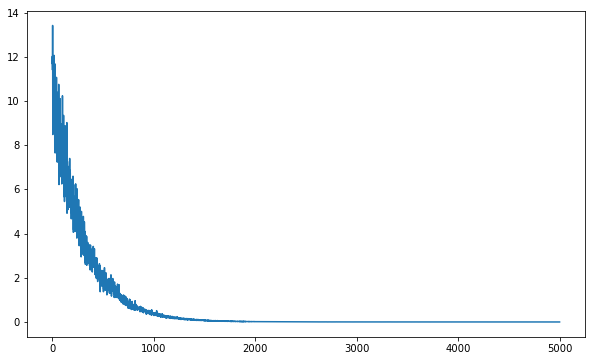

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(err)

# Computation Graph

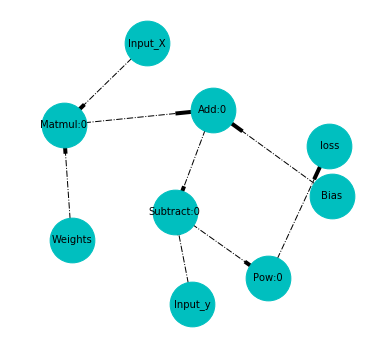

In [7]:
graph.show()